In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [5]:
print("Train Set Contain \nRows: {} Coloums: {}".format(train.shape[0], train.shape[1]))

Train Set Contain 
Rows: 23856 Coloums: 18


In [6]:
print("Test Set Contain \nRows: {} Coloums: {}".format(test.shape[0], test.shape[1]))

Test Set Contain 
Rows: 15903 Coloums: 17


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
X_1,23856.0,0.483778,1.439738,0.0,0.0,0.0,0.0,7.0
X_2,23856.0,24.791206,15.240231,0.0,7.0,24.0,36.0,52.0
X_3,23856.0,24.637450,15.135093,0.0,8.0,24.0,35.0,52.0
X_4,23856.0,4.276744,2.944672,0.0,2.0,4.0,6.0,10.0
X_5,23856.0,2.455609,1.963095,0.0,1.0,3.0,5.0,5.0
X_6,23856.0,6.154175,4.471756,1.0,3.0,5.0,8.0,19.0
X_7,23856.0,4.876509,3.881931,0.0,2.0,4.0,7.0,18.0
X_8,23856.0,0.972460,1.453144,0.0,0.0,1.0,1.0,99.0
X_9,23856.0,4.924128,1.362625,0.0,5.0,5.0,6.0,6.0
X_10,23856.0,1.244802,1.119301,1.0,1.0,1.0,1.0,90.0


In [9]:
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

INCIDENT_ID          0.0 %
DATE                 0.0 %
X_1                  0.0 %
X_2                  0.0 %
X_3                  0.0 %
X_4                  0.0 %
X_5                  0.0 %
X_6                  0.0 %
X_7                  0.0 %
X_8                  0.0 %
X_9                  0.0 %
X_10                 0.0 %
X_11                 0.0 %
X_12                0.76 %
X_13                 0.0 %
X_14                 0.0 %
X_15                 0.0 %
MULTIPLE_OFFENSE     0.0 %
dtype: object

In [10]:
round((test.isnull().sum()/ test.shape[0])*100, 2).astype(str) +" %"

INCIDENT_ID    0.0 %
DATE           0.0 %
X_1            0.0 %
X_2            0.0 %
X_3            0.0 %
X_4            0.0 %
X_5            0.0 %
X_6            0.0 %
X_7            0.0 %
X_8            0.0 %
X_9            0.0 %
X_10           0.0 %
X_11           0.0 %
X_12           0.8 %
X_13           0.0 %
X_14           0.0 %
X_15           0.0 %
dtype: object

In [11]:
train.MULTIPLE_OFFENSE.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

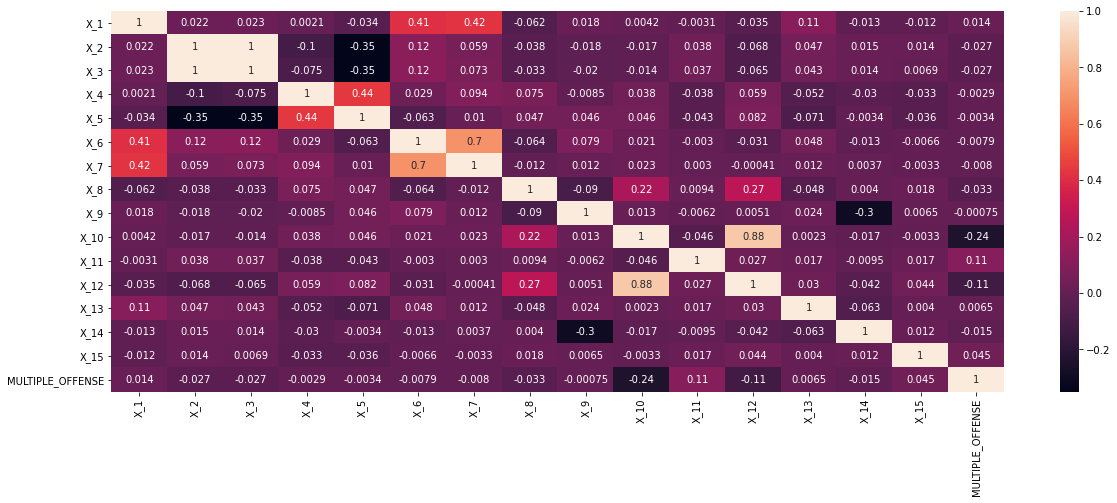

In [12]:
plt.figure(figsize=(20,7))
sns.heatmap(train.corr(),annot=True) #annot is used to show values in the heat map
plt.show()

In [13]:
train["X_12"].fillna(train["X_12"].median(), inplace = True)

In [14]:
test["X_12"].fillna(train["X_12"].median(), inplace = True)

In [15]:
round((train.isnull().sum() / train.shape[0])*100, 2).astype(str) +" %"

INCIDENT_ID         0.0 %
DATE                0.0 %
X_1                 0.0 %
X_2                 0.0 %
X_3                 0.0 %
X_4                 0.0 %
X_5                 0.0 %
X_6                 0.0 %
X_7                 0.0 %
X_8                 0.0 %
X_9                 0.0 %
X_10                0.0 %
X_11                0.0 %
X_12                0.0 %
X_13                0.0 %
X_14                0.0 %
X_15                0.0 %
MULTIPLE_OFFENSE    0.0 %
dtype: object

In [16]:
round((test.isnull().sum() / test.shape[0])*100, 2).astype(str) +" %"

INCIDENT_ID    0.0 %
DATE           0.0 %
X_1            0.0 %
X_2            0.0 %
X_3            0.0 %
X_4            0.0 %
X_5            0.0 %
X_6            0.0 %
X_7            0.0 %
X_8            0.0 %
X_9            0.0 %
X_10           0.0 %
X_11           0.0 %
X_12           0.0 %
X_13           0.0 %
X_14           0.0 %
X_15           0.0 %
dtype: object

In [17]:
test.shape

(15903, 17)

In [18]:
X = train.drop(["INCIDENT_ID","DATE","MULTIPLE_OFFENSE"], axis = 1)
Y = train['MULTIPLE_OFFENSE']

In [19]:
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43


In [20]:
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: MULTIPLE_OFFENSE, dtype: int64

In [21]:
X_id = test["INCIDENT_ID"]
test.drop(["INCIDENT_ID", "DATE"],axis = 1, inplace = True)

In [22]:
test.shape

(15903, 15)

In [23]:
X_id.head()

0    CR_195453
1    CR_103520
2    CR_196089
3    CR_112195
4    CR_149832
Name: INCIDENT_ID, dtype: object

In [24]:
test.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,1.0,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [25]:
#Used for getting coloumn values feature importances of coloumn values
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier()
selector.fit(X,Y)

ExtraTreesClassifier()

In [26]:
selector.feature_importances_

array([0.00690233, 0.0285823 , 0.02617385, 0.01813988, 0.01475956,
       0.0274412 , 0.02541965, 0.03610328, 0.02326252, 0.24280151,
       0.22904569, 0.11039268, 0.03817443, 0.03411898, 0.13868214])

In [27]:
feature_imp = selector.feature_importances_

In [28]:
for index,val in enumerate(feature_imp):
    print(index, round((val*100),2))

0 0.69
1 2.86
2 2.62
3 1.81
4 1.48
5 2.74
6 2.54
7 3.61
8 2.33
9 24.28
10 22.9
11 11.04
12 3.82
13 3.41
14 13.87


In [29]:
selected_coloumn = ["X_10", "X_11", "X_12", "X_15"]

In [30]:
X = X[selected_coloumn]

In [31]:
X.head()

,X_10,X_11,X_12,X_15
0,1,174,1.0,36
1,1,236,1.0,34
2,1,174,1.0,34
3,1,249,1.0,34
4,1,174,0.0,43


In [32]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [33]:
for col in X.columns:
    X[col] = scale.fit_transform(X[col].values.reshape(-1,1))

In [34]:
X.head()

,X_10,X_11,X_12,X_15
0,-0.218714,-0.354230,0.022126,0.302296
1,-0.218714,0.312212,0.022126,0.063822
2,-0.218714,-0.354230,0.022126,0.063822
3,-0.218714,0.451949,0.022126,0.063822
4,-0.218714,-0.354230,-0.837542,1.136955


In [35]:
#For Test
test.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,1.0,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [36]:
test = test[selected_coloumn]

In [37]:
test.head()

,X_10,X_11,X_12,X_15
0,1,174,1.0,23
1,1,316,0.0,34
2,1,316,1.0,34
3,1,174,1.0,34
4,1,174,0.0,43


In [38]:
for col in test.columns:
    test[col] = scale.fit_transform(test[col].values.reshape(-1,1))

In [39]:
test.head()

,X_10,X_11,X_12,X_15
0,-0.286551,-0.353946,0.031544,-1.253620
1,-0.286551,1.171216,-1.113752,0.069446
2,-0.286551,1.171216,0.031544,0.069446
3,-0.286551,-0.353946,0.031544,0.069446
4,-0.286551,-0.353946,-1.113752,1.151954


In [40]:
Y.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [41]:
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(random_state=0)

In [42]:
over_sample.fit(X,Y)

RandomOverSampler(random_state=0)

In [43]:
X_resample, Y_resample = over_sample.fit_resample(X,Y)

In [44]:
Y_resample.value_counts()

1    22788
0    22788
Name: MULTIPLE_OFFENSE, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resample, Y_resample, test_size = 0.2, random_state = 0)

In [46]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (36460, 4)
X_test shape: (9116, 4)
Y_train shape: (36460,)
Y_test shape: (9116,)


In [47]:
#Decision Tree
#criterion = gini
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 0)

In [48]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [49]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [51]:
print('Decision Tree Classifier:',round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print(round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))
print(round(recall_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier: 99.97
99.97
99.93


In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_dec_tree)

In [53]:
cm

array([[4587,    0],
       [   3, 4526]], dtype=int64)

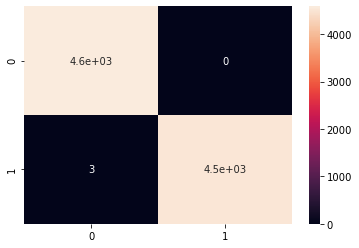

In [74]:
sns.heatmap(cm, annot=True)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_dec_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4587
           1       1.00      1.00      1.00      4529

    accuracy                           1.00      9116
   macro avg       1.00      1.00      1.00      9116
weighted avg       1.00      1.00      1.00      9116



In [55]:
test_pred = dec_tree.predict(test)

In [56]:
test_pred.shape

(15903,)

In [57]:
result = pd.DataFrame({'INCIDENT_ID': X_id, 'MULTIPLE_OFFENSE': test_pred})

In [58]:
result.head(10)

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
5,CR_81654,1
6,CR_139009,1
7,CR_6108,1
8,CR_62283,1
9,CR_5710,1


In [59]:
result.to_csv('Final_gini.csv', index = False)

In [61]:
#Decision Tree
#criterion = entropy
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion="entropy", random_state = 0)

In [62]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [65]:
print('Decision Tree Classifier:',round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print(round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))
print(round(recall_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier: 99.97
99.97
99.93


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_dec_tree)

In [67]:
cm

array([[4587,    0],
       [   3, 4526]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_dec_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4587
           1       1.00      1.00      1.00      4529

    accuracy                           1.00      9116
   macro avg       1.00      1.00      1.00      9116
weighted avg       1.00      1.00      1.00      9116



In [69]:
test_pred = dec_tree.predict(test)

In [70]:
test_pred.shape

(15903,)

In [71]:
result = pd.DataFrame({'INCIDENT_ID': X_id, 'MULTIPLE_OFFENSE': test_pred})

In [72]:
result.head(10)

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
5,CR_81654,1
6,CR_139009,1
7,CR_6108,1
8,CR_62283,1
9,CR_5710,1


In [73]:
result.to_csv('Final_entropy.csv', index = False)